# Import lib

In [1]:
from numpy import mean
from numpy import std
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Get dataset

In [2]:
data = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [4]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
X = data[data.columns[0:2]]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
dtypes: int64(2)
memory usage: 6.4 KB


In [6]:
y = data['Purchased']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [7]:
cv = KFold(n_splits=5)

# Scale Data

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Logistic Regression

In [9]:
lr = LogisticRegression(random_state=0)

In [10]:
from sklearn.metrics import accuracy_score
acc = []
for train_index, test_index in cv.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)
  acc.append(accuracy_score(y_pred, y_test))

In [11]:
print('Logistic Regression accuracy: ', mean(acc))

Logistic Regression accuracy:  0.8225


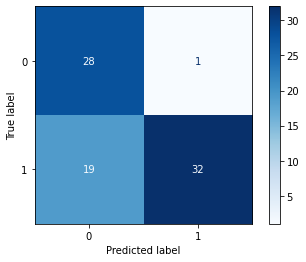

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test, cmap='Blues')

# SVM

In [13]:
clf_svm = SVC(gamma='auto', random_state=0)

In [14]:
from sklearn.metrics import accuracy_score
acc = []
for train_index, test_index in cv.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf_svm.fit(X_train, y_train)
  y_pred = clf_svm.predict(X_test)
  acc.append(accuracy_score(y_pred, y_test))

In [15]:
print('SVM accuracy: ', mean(acc))

SVM accuracy:  0.9099999999999999


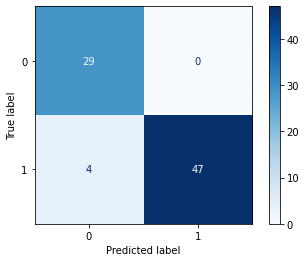

In [16]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_svm, X_test, y_test, cmap='Blues')

# Naive Bayes

In [17]:
gnb = GaussianNB()

In [18]:
from sklearn.metrics import accuracy_score
acc = []
for train_index, test_index in cv.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  gnb.fit(X_train, y_train)
  y_pred = gnb.predict(X_test)
  acc.append(accuracy_score(y_pred, y_test))

In [19]:
print('Naive Bayes accuracy: ', mean(acc))

Naive Bayes accuracy:  0.8574999999999999


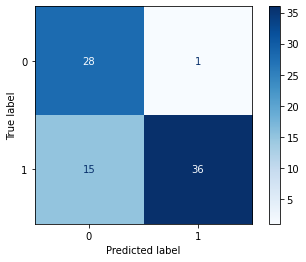

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, X_test, y_test, cmap='Blues')

# Decision Tree

In [21]:
de_tree = tree.DecisionTreeClassifier(random_state=0)

In [22]:
from sklearn.metrics import accuracy_score
acc = []
for train_index, test_index in cv.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  de_tree.fit(X_train, y_train)
  y_pred = de_tree.predict(X_test)
  acc.append(accuracy_score(y_pred, y_test))

In [23]:
print('Decision Tree accuracy: ', mean(acc))

Decision Tree accuracy:  0.8575000000000002


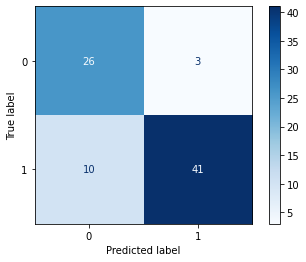

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(de_tree, X_test, y_test, cmap='Blues')

# Random Forest

In [25]:
forest = RandomForestClassifier(max_depth=2, random_state=0)

In [26]:
scores = cross_val_score(forest, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
# report performance
print('Random Forest Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Random Forest Accuracy: 0.915 (0.060)


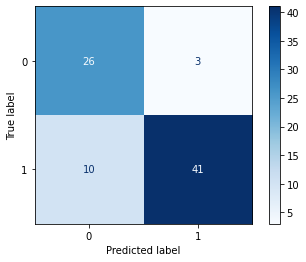

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(de_tree, X_test, y_test, cmap='Blues')